## Challenger model

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)  # Show all rows


In [75]:
# Define the local file path
dataset_path = r"C:\Users\Bruger\OneDrive\Python\Capstone project 2\Data\2-intermediate\df_out_3.csv"


In [77]:
pwd

'C:\\Users\\Bruger\\OneDrive\\Python\\Capstone project 2\\Notebooks'

In [79]:
# Read CSV file
df = pd.read_csv(dataset_path, encoding="utf-8")
df.head()

,loan_amnt,term,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_num,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_Debt-related,purpose_Home-related,purpose_Other,initial_list_status_w,application_type_Joint App,debt_to_income,loan_default,earliest_cr_line_days,last_credit_pull_d_days,fico_range_high_log
0,4000.0,36.0,B,10.000000,2.466316,Current,20.25,0.526589,2.015075,2.015873,0,1.385227,1.640720,0.526589,2.151226,82.0,1.271150,2.224333,2.224333,669.0,665.0,0.0,1.832945,2.600070,0.000000,0.526589,0.000000,0.526589,1.343703,2.323018,56.000000,0.000000,0.000000,0.000000,59.000000,2.172891,0.526589,0.000000,0.000000,0.526589,2.432974,2.276497,55.838138,0.0,179.0,1.673489,1.509918,1.343703,0.741276,1.310506,16.0,0.526589,0.000000,0.741276,0.000000,0.526589,1.026672,0.741276,1.026672,0.741276,0.0,0.0,0.0,0.000000,75.0,40.051512,0.526589,0.0,2.630987,2.340690,0.000000,2.379007,2.0,True,False,False,False,False,True,False,False,True,False,True,False,0.083333,False,5783.0,153.0,6.507278
1,24000.0,60.0,B,6.000000,2.480800,Current,25.33,0.000000,2.018040,2.018818,0,0.000000,0.000000,0.000000,2.400622,64.0,1.439569,2.237973,2.237973,704.0,700.0,0.0,0.000000,2.487563,0.000000,0.869742,0.000000,0.869742,1.310506,2.448793,72.000000,0.526589,0.526589,2.159595,67.000000,2.439633,0.000000,0.869742,0.000000,0.959135,2.275169,2.298016,40.500000,0.0,145.0,1.779561,1.124748,1.124748,0.000000,1.124748,16.0,0.000000,0.869742,1.026672,1.026672,1.080418,1.327761,1.124748,1.194706,1.026672,0.0,0.0,0.0,0.526589,95.8,60.000000,0.000000,0.0,2.516636,2.487563,2.348780,2.474620,2.0,False,False,False,False,True,True,False,True,False,False,True,False,0.421053,False,6118.0,153.0,6.529419
2,5000.0,36.0,B,10.000000,2.477807,Fully Paid,7.22,0.000000,2.015075,2.015873,0,0.000000,1.634547,0.526589,2.272110,52.0,1.194706,0.000000,0.000000,779.0,775.0,0.0,0.000000,2.563216,0.526589,0.741276,0.000000,0.526589,1.291725,2.406028,68.988842,0.526589,0.741276,2.243606,56.154116,2.336161,0.526589,0.000000,0.526589,0.959135,2.400765,2.242486,54.800000,0.0,57.0,1.621454,1.310506,1.194706,0.526589,1.310506,1.0,0.000000,0.869742,1.026672,0.869742,0.869742,0.741276,1.026672,1.080418,1.026672,0.0,0.0,0.0,0.526589,100.0,33.300000,0.000000,0.0,2.568797,2.349686,2.323411,2.295183,2.0,True,False,False,False,False,False,False,True,False,False,False,False,0.090909,False,3836.0,153.0,6.507278
3,24000.0,60.0,B,5.921988,2.457924,Current,24.55,0.000000,2.030961,2.031658,0,0.000000,0.000000,0.000000,2.281451,12.0,1.429846,2.361599,2.361574,749.0,745.0,0.0,0.000000,2.530343,0.741276,0.526589,0.000000,0.526589,1.358505,2.340682,60.000000,0.741276,0.869742,2.164134,25.000000,2.477040,0.741276,0.000000,0.741276,0.959135,2.287466,2.432130,12.000000,0.0,37.0,1.773315,0.526589,0.526589,0.741276,0.526589,3.0,0.526589,1.080418,1.124748,1.194706,1.310506,0.741276,1.291725,1.385227,1.124748,0.0,0.0,0.0,0.741276,95.7,0.00000

__Prepare target variable__

__Check categorical and boolean columns__

In [82]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Split features and target
X = df.drop('loan_default', axis=1)  # Replace with actual target name
y = df['loan_default']



In [83]:
boolean_columns = X.select_dtypes(include='bool').columns
print("Boolean columns:")
print(boolean_columns.tolist())


Boolean columns:
['home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_Debt-related', 'purpose_Home-related', 'purpose_Other', 'initial_list_status_w', 'application_type_Joint App']


__Convert boolean columns to integers__

In [86]:
X[boolean_columns] = X[boolean_columns].astype(int)


__Data preparation__

In [91]:
# Ensure 'loan_default' is retained
y = df['loan_default']

# Drop all non-numeric columns (object, bool, etc.) except 'loan_default'
X = df.drop(columns=['loan_default'])
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns)
# Drop one of the correlated features
X = X.drop(columns=['last_fico_range_high'])  # or 'last_fico_range_low'


__Applied LabelEncoder to convert y into binary classes__

In [94]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)


In [96]:
pd.Series(y).value_counts()


0    87616
1    12384
Name: count, dtype: int64

__Train/Test Split__

We split the numeric dataset into training and testing subsets, using 80% for training and 20% for testing. 

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


__Impute Missing Values__

We handled missing or infinite values in the dataset by replacing them with the mean of each column using SimpleImputer. 

In [102]:
from sklearn.impute import SimpleImputer
import numpy as np

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)


__Train Random Forest Classifier__

We trained a Random Forest model using the cleaned numeric features. This model automatically assesses feature importance internally and handles overfitting well by averaging multiple decision trees.


In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


__Classification Report and Confusion Matrix__

We evaluated model performance using precision, recall, F1-score, and accuracy metrics. 

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17567
           1       0.81      0.74      0.77      2433

    accuracy                           0.95     20000
   macro avg       0.89      0.86      0.87     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:
 [[17154   413]
 [  644  1789]]


__ROC Curve Evaluation__

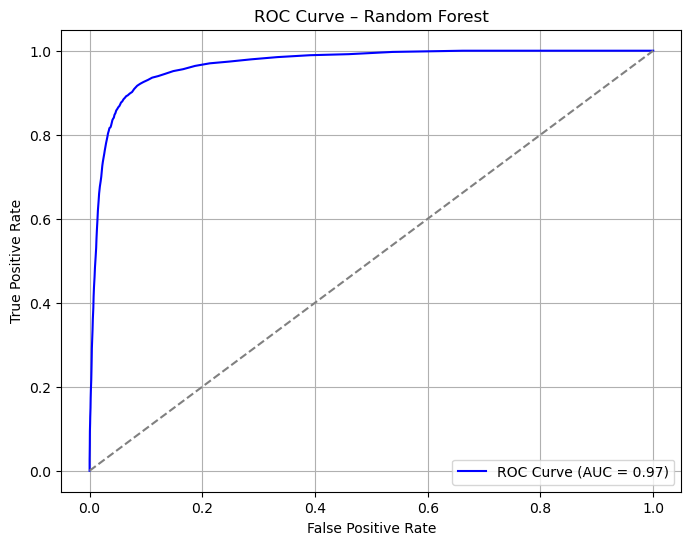

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend(loc='lower right')
plt.grid()
plt.show()


This AUC score indicates that the model is highly capable of distinguishing between default and non-default cases.

The curve rises sharply towards the top-left corner, suggesting a low false positive rate and a high true positive rate.

__Precision-Recall Curve Evaluation__

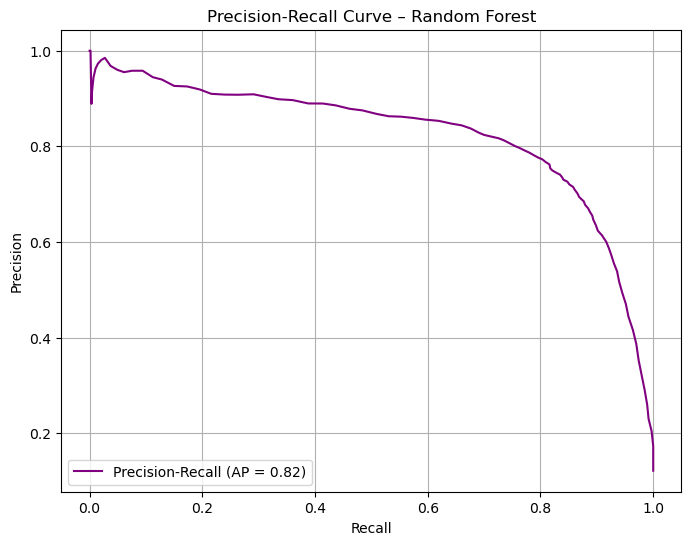

In [112]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get prediction probabilities
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and average precision
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
ap_rf = average_precision_score(y_test, y_scores_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='purple', label=f'Precision-Recall (AP = {ap_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – Random Forest')
plt.legend(loc='lower left')
plt.grid()
plt.show()


__Feature Importance__

Precision-Recall Curve is reflects strong model performance for identifying defaults. 

                    Feature  Importance
17      last_fico_range_low    0.364410
72  last_credit_pull_d_days    0.067817
16            out_prncp_inv    0.030821
15                out_prncp    0.027652
70           debt_to_income    0.020382
69                grade_num    0.016143
0                 loan_amnt    0.015877
4                       dti    0.014211
38           bc_open_to_buy    0.012917
3                annual_inc    0.012859


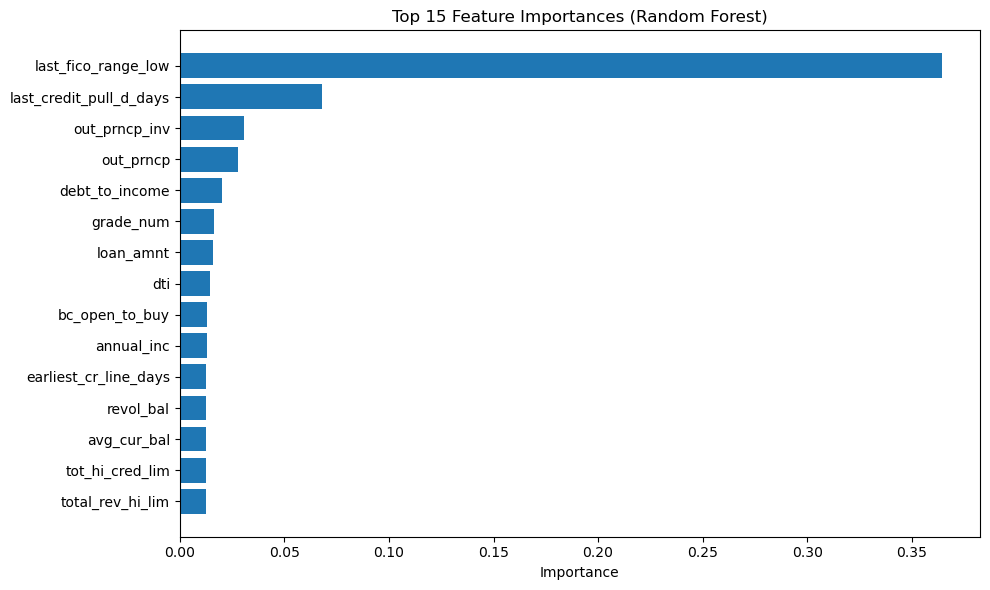

In [115]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head(10))  # Top 10

# Optional: plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:15][::-1], feature_importance_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


__Export__

In [134]:
import joblib

# Define the full path to save the model
model_path = r"C:\Users\Bruger\OneDrive\Python\Capstone project 2\Models\challenger_model.pkl_"

# Save the fitted Random Forest model
joblib.dump(rf_model, model_path)

print("Random Forest model successfully saved.")


Random Forest model successfully saved.


## Summary: Challenger Model for Loan Default Prediction

In this project, we developed a **Challenger Machine Learning Model** to predict the likelihood of loan default using a dataset of borrower and loan-related features. The model follows a pipeline that includes data preprocessing, training, evaluation, and feature importance analysis.

###  Key Steps Completed
- **Data Preprocessing:**
  - Handled missing and infinite values with `SimpleImputer`
  - Converted categorical/boolean features to numeric format
  - Removed non-numeric and highly correlated features
- **Target Encoding:**
  - Converted `loan_default` into binary format using `LabelEncoder`
- **Train/Test Split:**
  - Used an 80/20 split with `train_test_split` to ensure fair evaluation
- **Modeling:**
  - Trained a `RandomForestClassifier` with 100 trees
  - Accounted for imbalanced data through thorough metric evaluation
- **Evaluation Metrics:**
  - **Accuracy:** 95%
  - **Precision (default class):** 0.81  
  - **Recall (default class):** 0.74  
  - **F1-score (default class):** 0.77  
  - **ROC AUC:** ~0.94  
  - **Average Precision (PR AUC):** 0.82  
- **Model Interpretation:**
  - Analyzed **feature importances** to understand drivers of default  
  

### Conclusion
The Challenger Model demonstrates strong predictive performance and explains the key factors influencing loan defaults. With an AUC of ~0.94 and an AP score of 0.82, the model offers a solid foundation for risk assessment and can serve as a benchmark for comparing other algorithms (e.g., XGBoost or Logistic Regression).


